# Data Transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import non normal data (exponential distribution)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df

,values
0,0.444699
1,0.529809
2,0.404649
3,2.974751
4,2.424184
...,...
995,1.882531
996,0.397612
997,0.672205
998,2.501600


In [2]:
df.shape

(1000, 1)

<Axes: ylabel='Count'>

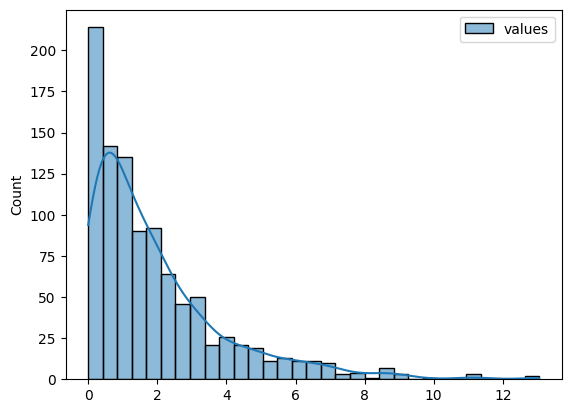

In [3]:
sns.histplot(data=df, kde=True)

In [4]:
df.min()

values    0.000704
dtype: float64

### data must be positive for boxcox transformation

In [5]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo = PowerTransformer(method='yeo-johnson')
pt_normal = QuantileTransformer(output_distribution='normal')

df['BoxCox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['YeoJohnson'] = pt_yeo.fit_transform(df[['values']])
df['Quantile'] = pt_normal.fit_transform(df[['values']])
df.head()

,values,BoxCox,YeoJohnson,Quantile
0,0.444699,-0.929360,-0.929360,-0.771450
1,0.529809,-0.805367,-0.805367,-0.654930
2,0.404649,-0.991294,-0.991294,-0.840906
3,2.974751,0.897466,0.897466,0.798769
4,2.424184,0.672075,0.672075,0.611996


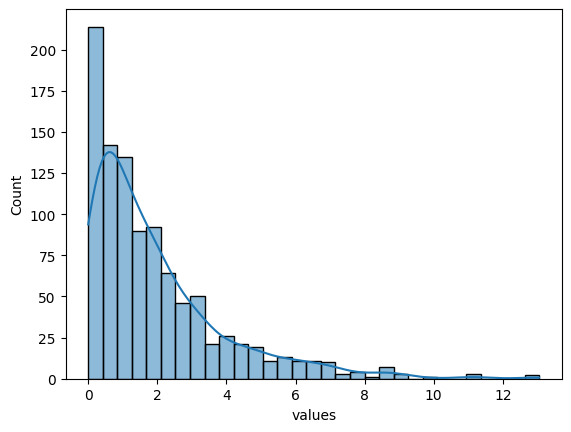

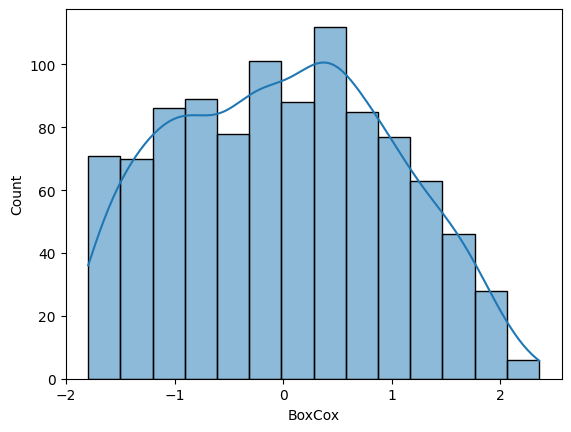

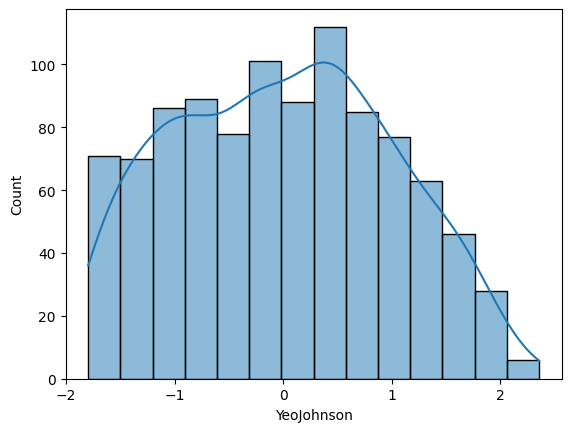

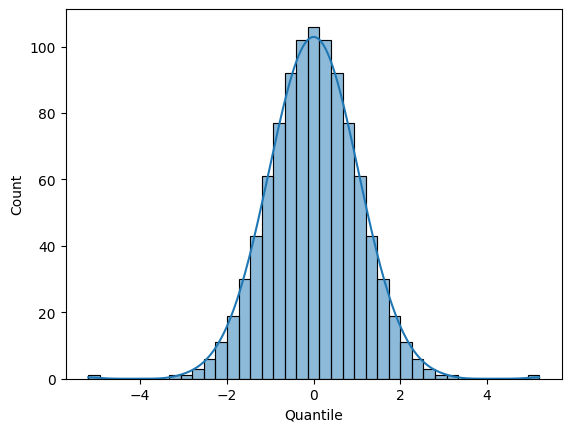

In [6]:
# plot histplot of above columns with kde = Tue using for loop
for col in df.columns:
    sns.histplot(data=df, x=col, kde=True)
    plt.show()

## The Data has been successfully been Transfomed